*Import data, and install package*

In [160]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [161]:
import pandas as pd
import sqlalchemy as sa
import requests
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text
from sqlalchemy.exc import ProgrammingError

In [162]:
resource_id = '15b54ed9-f711-45c8-bd87-30eb626f7c0a'
limit = 1500
offset = 0

In [163]:
api_url = 'https://data.ontario.ca/api/3/action/datastore_search?resource_id={}&limit={}&offset={}'.format(resource_id,limit,offset)
print(api_url)

https://data.ontario.ca/api/3/action/datastore_search?resource_id=15b54ed9-f711-45c8-bd87-30eb626f7c0a&limit=1500&offset=0


In [164]:
api_response = requests.get(api_url)
api_response


<Response [200]>

In [165]:
data = api_response.json()
data

{'help': 'https://data.ontario.ca/api/3/action/help_show?name=datastore_search',
 'success': True,
 'result': {'include_total': True,
  'limit': 1500,
  'offset': 0,
  'records_format': 'objects',
  'resource_id': '15b54ed9-f711-45c8-bd87-30eb626f7c0a',
  'total_estimation_threshold': None,
  'records': [{'_id': 1,
    'Date': '1990-01-03T00:00:00',
    'Ottawa': 55.9,
    'Toronto West/Ouest': 49.1,
    'Toronto East/Est': 48.7,
    'Windsor': 45.2,
    'London': 50.1,
    'Peterborough': '0',
    "St. Catharine's": '0',
    'Sudbury': 56.4,
    'Sault Saint Marie': 54.8,
    'Thunder Bay': 56.6,
    'North Bay': 55.1,
    'Timmins': 58.1,
    'Kenora': '0',
    'Parry Sound': '0',
    'Ontario Average/Moyenne provinciale': 50.3,
    "Southern Average/Moyenne du sud de l'Ontario": 49.5,
    "Northern Average/Moyenne du nord de l'Ontario": 56.2,
    'Fuel Type': 'Regular Unleaded Gasoline',
    'Type de carburant': 'Essence sans plomb'},
   {'_id': 2,
    'Date': '1990-01-10T00:00:00',

In [166]:
fuel_price = pd.DataFrame(data['result']['records'])
fuel_price

,_id,Date,Ottawa,Toronto West/Ouest,Toronto East/Est,Windsor,London,Peterborough,St. Catharine's,Sudbury,...,Thunder Bay,North Bay,Timmins,Kenora,Parry Sound,Ontario Average/Moyenne provinciale,Southern Average/Moyenne du sud de l'Ontario,Northern Average/Moyenne du nord de l'Ontario,Fuel Type,Type de carburant
0,1,1990-01-03T00:00:00,55.9,49.1,48.7,45.2,50.1,0,0,56.4,...,56.6,55.1,58.1,0,0,50.3,49.5,56.2,Regular Unleaded Gasoline,Essence sans plomb
1,2,1990-01-10T00:00:00,55.9,47.7,46.8,49.7,47.6,0,0,56.4,...,56.8,55.0,58.2,0,0,49.2,48.3,56.2,Regular Unleaded Gasoline,Essence sans plomb
2,3,1990-01-17T00:00:00,55.9,53.2,53.2,49.6,53.7,0,0,55.8,...,56.8,54.4,58.2,0,0,53.6,53.3,56.0,Regular Unleaded Gasoline,Essence sans plomb
3,4,1990-01-24T00:00:00,55.9,53.2,53.5,49.0,52.1,0,0,55.7,...,56.8,54.3,58.2,0,0,53.5,53.2,56.0,Regular Unleaded Gasoline,Essence sans plomb
4,5,1990-01-31T00:00:00,55.9,51.9,52.6,48.6,49.1,0,0,55.6,...,56.8,54.2,58.1,0,0,52.5,52.1,55.9,Regular Unleaded Gasoline,Essence sans plomb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,2018-08-27T00:00:00,126.5,133.5,133.1,123.1,132.2,0,0,136.0,...,145.3,126.8,139.9,0,0,131.9,131.2,137.0,Regular Unleaded Gasoline,Essence sans plomb
1496,1497,2018-09-04T00:00:00,127.4,134.4,133.8,128.1,133.9,0,0,134.8,...,145.3,133.8,139.9,0,0,132.9,132.4,137.1,Regular Unleaded Gasoline,Essence sans plomb
1497,1498,2018-09-10T00:00:00,125.9,133.1,132.8,126.0,131.4,0,0,138.6,...,145.2,132.3,139.9,0,0,131.9,131.0,139.3,Regular Unleaded Gasoline,Essence sans plomb
1498,1499,2018-09-17T00:00:00,122.2,129.2,127.9,122.6,128.3,0,0,135.6,...,145.2,129.9,137.9,0,0,128.1,126.9,137.6,Regular Unleaded Gasoline,Essence sans plomb


Based on that, we can see
 
- _id: This is a unique identifier for each row of data.

- Date: This column records the date when each weekly fuel price was recorded. It is formatted in ISO 8601 standard (YYYY-MM-DDTHH:MM:SS).

- Ottawa, Toronto West/Ouest, Toronto East/Est, Windsor, London, Peterborough, St. Catharine's, Sudbury, Sault Saint Marie, Thunder Bay, North Bay, Timmins, Kenora, Parry Sound: These are the names of cities in Ontario. Each city has a column that represents the price of regular unleaded gasoline in that location at the recorded date.

- Ontario Average/Moyenne provinciale: This column represents the average price of regular unleaded gasoline across the entire province of Ontario on the recorded date.

- Southern Average/Moyenne du sud de l'Ontario, Northern Average/Moyenne du nord de l'Ontario: These columns represent the average price of regular unleaded gasoline in the southern and northern regions of Ontario, respectively, on the recorded date.

- Fuel Type, Type de carburant: These columns identify the type of fuel that the prices refer to. In this dataset, all prices are for regular unleaded gasoline.

In [167]:
df_new = fuel_price[['Date', 'Toronto West/Ouest', 'Toronto East/Est', 'Ontario Average/Moyenne provinciale', 'Fuel Type']]
print(df_new)

                     Date  Toronto West/Ouest  Toronto East/Est   
0     1990-01-03T00:00:00                49.1              48.7  \
1     1990-01-10T00:00:00                47.7              46.8   
2     1990-01-17T00:00:00                53.2              53.2   
3     1990-01-24T00:00:00                53.2              53.5   
4     1990-01-31T00:00:00                51.9              52.6   
...                   ...                 ...               ...   
1495  2018-08-27T00:00:00               133.5             133.1   
1496  2018-09-04T00:00:00               134.4             133.8   
1497  2018-09-10T00:00:00               133.1             132.8   
1498  2018-09-17T00:00:00               129.2             127.9   
1499  2018-09-24T00:00:00               125.5             124.1   

      Ontario Average/Moyenne provinciale                  Fuel Type  
0                                    50.3  Regular Unleaded Gasoline  
1                                    49.2  Regular Un

In [168]:
df_new['Difference Ontario Average'] = pd.to_datetime(df_new['Ontario Average/Moyenne provinciale'])

C:\Users\dashuaibi\AppData\Local\Temp\ipykernel_4924\2406092113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Difference Ontario Average'] = pd.to_datetime(df_new['Ontario Average/Moyenne provinciale'])


In [169]:
df_new['Date'] = pd.to_datetime(df_new['Date'])
df_new['Difference Ontario Average'] = df_new['Ontario Average/Moyenne provinciale'].diff()
print(df_new.head())

        Date  Toronto West/Ouest  Toronto East/Est   
0 1990-01-03                49.1              48.7  \
1 1990-01-10                47.7              46.8   
2 1990-01-17                53.2              53.2   
3 1990-01-24                53.2              53.5   
4 1990-01-31                51.9              52.6   

   Ontario Average/Moyenne provinciale                  Fuel Type   
0                                 50.3  Regular Unleaded Gasoline  \
1                                 49.2  Regular Unleaded Gasoline   
2                                 53.6  Regular Unleaded Gasoline   
3                                 53.5  Regular Unleaded Gasoline   
4                                 52.5  Regular Unleaded Gasoline   

   Difference Ontario Average  
0                         NaN  
1                        -1.1  
2                         4.4  
3                        -0.1  
4                        -1.0  


C:\Users\dashuaibi\AppData\Local\Temp\ipykernel_4924\3362918327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Date'] = pd.to_datetime(df_new['Date'])
C:\Users\dashuaibi\AppData\Local\Temp\ipykernel_4924\3362918327.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Difference Ontario Average'] = df_new['Ontario Average/Moyenne provinciale'].diff()


In [170]:
df_new.loc[:, 'Date'] = pd.to_datetime(df_new['Date'])
df_new.loc[:, 'Difference Ontario Average'] = df_new['Ontario Average/Moyenne provinciale'].diff()

In [171]:
df_new = fuel_price[['Date', 'Toronto West/Ouest', 'Toronto East/Est', 'Ontario Average/Moyenne provinciale', 'Fuel Type']].copy()

Check the Toronto West/ Quest mean value

In [172]:
print(df_new['Toronto West/Ouest'].mean())

83.3776


In [173]:
df_new.reset_index(inplace=True)

In [174]:
df_new.set_index('Date', inplace=True)

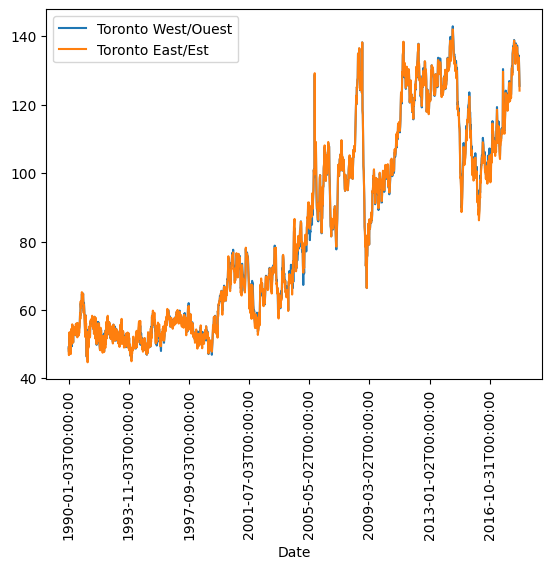

In [175]:
df_new[['Toronto West/Ouest', 'Toronto East/Est']].plot(kind='line')
plt.xticks(rotation=90)
plt.show()

$ Push Data to Postgres Database $

In [176]:
db_secret = {
    'drivername' : 'postgresql+psycopg2',
    'host'       : 'mmai5100postgres.canadacentral.cloudapp.azure.com',
    'port'       : '5432',
    'username'   : 'john779',
    'password'   : '2023!Schulich',
    'database'   : 'john779_db'
}

In [177]:
db_connection_url = sa.engine.URL.create(
    drivername = db_secret['drivername'],
    username   = db_secret['username'],
    password   = db_secret['password'],
    host       = db_secret['host'],
    port       = db_secret['port'],
    database   = db_secret['database']
)

In [178]:
engine = create_engine(db_connection_url)

In [179]:
with engine.connect() as connection:
    connection.execute(text('CREATE SCHEMA IF NOT EXISTS fuel;'))

In [180]:
df_new.to_sql(
        name = 'Ontario Average/Moyenne provinciale',
        schema = 'fuel',
        con = engine,
        if_exists = 'replace',
        index=False,
        method='multi',
        dtype= {
            'reported_date' : sa.types.DATE,
            'new_cases'     : sa.types.DECIMAL(10,0)
        }   
    )

1500